In [2]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

- actiontype: 문서 이용시 행동(OPEN, CLOSE, SAVE)
- ismydoc: 내문서 해당 여부
- ext: 문서 확장자
- sessionid: 유저 식별자
- documentposition: 문서 이용시 위치 정보(CLOUD, OTHERAPP)
- datetime: Timestamp
- screen: 앱내 화면 이름

##### 1.0 데이터 전처리

In [3]:
# 문서 앱
folder = 'C:/Users/su/OneDrive - 청주대학교 (1)/datasets/before/2023'
file_name = '[2023_08_11]Data_Funnel'
funnel_data = 'df_funnel.csv'

In [4]:
encoding='utf-8'
funnel_data = pd.read_csv(os.path.join(folder, file_name, funnel_data), encoding=encoding)

In [5]:
funnel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301861 entries, 0 to 301860
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        301861 non-null  int64 
 1   actiontype        301861 non-null  object
 2   ismydoc           301861 non-null  object
 3   ext               301861 non-null  object
 4   sessionid         301861 non-null  object
 5   documentposition  301861 non-null  object
 6   datetime          301861 non-null  object
 7   screen            301861 non-null  object
dtypes: int64(1), object(7)
memory usage: 18.4+ MB


In [6]:
funnel_data.head()

,Unnamed: 0,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
0,0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016.7.18,Per_Dir
1,1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016.7.18,Per_Dir
2,2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016.7.18,Pub_Dir
3,3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016.7.18,Pub_Dir
4,4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016.7.6,Main


In [7]:
funnel_data.actiontype.unique()

array(['OPEN', 'CLOSE', 'RESET', 'SAVEAS', 'SAVE', 'SAVEAS_OTHER',
       'EXPORT_SAME', 'EXPORT'], dtype=object)

In [8]:
funnel_data.ext.unique()

array(['PDF', 'HWP', 'XLSX', 'PPT', 'DOCX', 'ODT', 'DOC', 'XLS', 'PPTX',
       'TXT', 'PPS', 'PPSX', 'WORD', 'PNG', 'JPG', 'SHEET'], dtype=object)

In [9]:
funnel_data.documentposition.unique()

array(['LOCALSTORAGE', 'MYPOLARISDRIVE', 'OTHERAPP', 'NEWDOCUMENT',
       'NONE', 'OTHERCLOUD', 'SHAREDDOCUMENT'], dtype=object)

In [10]:
funnel_data.screen.unique()

array(['Per_Dir', 'Pub_Dir', 'Main', 'InProduct_Web', 'InProduct_Mob',
       'Purchase_page', 'Purchase_done'], dtype=object)

In [11]:
funnel_data.datetime.unique()

array(['2016.7.18', '2016.7.6', '2016.7.20', '2016.7.28', '2016.7.19',
       '2016.7.24', '2016.7.11', '2016.7.22', '2016.7.16', '2016.7.8',
       '2016.7.1', '2016.7.12', '2016.7.5', '2016.7.4', '2016.7.21',
       '2016.7.15', '2016.7.23', '2016.7.9', '2016.7.29', '2016.7.27',
       '2016.7.25', '2016.7.13', '2016.7.2', '2016.7.3', '2016.7.17',
       '2016.7.26', '2016.7.10', '2016.7.14', '2016.7.7', '2016.7.30'],
      dtype=object)

In [12]:
# index 번호랑 같으므로 drop
# funnel_data = funnel_data.drop('Unnamed: 0', axis=1)
# funnel_data.head()

In [13]:
# datetime의 데이터 타입을 datetime으로 변경
funnel_data['datetime'] = pd.to_datetime(funnel_data['datetime'], format='%Y.%m.%d')
# funnel_data['datetime'] = pd.to_datetime(funnel_data['datetime'], format='%Y.%m.%d').dt.strftime('%Y-%m-%d')

In [14]:
# 데이터가 한달치 데이터인것을 확인
print(funnel_data.datetime.min())
print(funnel_data.datetime.max())

2016-07-01 00:00:00
2016-07-30 00:00:00


##### 1.1 확장자명 통일 후 일별 확장자 사용 횟수 확인

In [15]:
funnel_data.ext.unique()

array(['PDF', 'HWP', 'XLSX', 'PPT', 'DOCX', 'ODT', 'DOC', 'XLS', 'PPTX',
       'TXT', 'PPS', 'PPSX', 'WORD', 'PNG', 'JPG', 'SHEET'], dtype=object)

In [16]:
ext_dic = {'DOCX': 'DOC',
           'XLSX': 'XLS',
           'PPTX': 'PPT',
           'PPSX': 'PPT',
           'PPS': 'PPT',
           'ODT': 'TXT',
           'PNG': 'JPG'}

In [17]:
funnel_data.ext = funnel_data.ext.replace(ext_dic)

In [18]:
funnel_data.ext.unique()

array(['PDF', 'HWP', 'XLS', 'PPT', 'DOC', 'TXT', 'WORD', 'JPG', 'SHEET'],
      dtype=object)

In [19]:
funnel_data_ext = funnel_data.groupby(['datetime', 'ext',])['sessionid'].nunique().unstack()
funnel_data_ext.head()

ext,DOC,HWP,JPG,PDF,PPT,SHEET,TXT,WORD,XLS
datetime,,,,,,,,,
2016-07-01,1410.0,404.0,NaN,1470.0,391.0,1.0,169.0,NaN,1392.0
2016-07-02,1023.0,248.0,2.0,1160.0,308.0,NaN,184.0,NaN,1001.0
2016-07-03,754.0,257.0,NaN,822.0,247.0,NaN,130.0,NaN,626.0
2016-07-04,1044.0,405.0,NaN,1157.0,324.0,NaN,158.0,NaN,1026.0
2016-07-05,1237.0,383.0,NaN,1387.0,426.0,NaN,164.0,NaN,1242.0


In [20]:
# 결측치 처리.
funnel_data_ext.fillna(0)

ext,DOC,HWP,JPG,PDF,PPT,SHEET,TXT,WORD,XLS
datetime,,,,,,,,,
2016-07-01,1410.0,404.0,0.0,1470.0,391.0,1.0,169.0,0.0,1392.0
2016-07-02,1023.0,248.0,2.0,1160.0,308.0,0.0,184.0,0.0,1001.0
2016-07-03,754.0,257.0,0.0,822.0,247.0,0.0,130.0,0.0,626.0
2016-07-04,1044.0,405.0,0.0,1157.0,324.0,0.0,158.0,0.0,1026.0
2016-07-05,1237.0,383.0,0.0,1387.0,426.0,0.0,164.0,0.0,1242.0
2016-07-06,1223.0,398.0,1.0,1384.0,394.0,0.0,151.0,0.0,1109.0
2016-07-07,1150.0,424.0,0.0,1319.0,389.0,1.0,134.0,0.0,1081.0
2016-07-08,1198.0,405.0,0.0,1302.0,373.0,0.0,148.0,0.0,1146.0
2016-07-09,940.0,294.0,0.0,1008.0,294.0,0.0,163.0,0.0,925.0


Text(0.5, 1.0, 'Daily ext log')

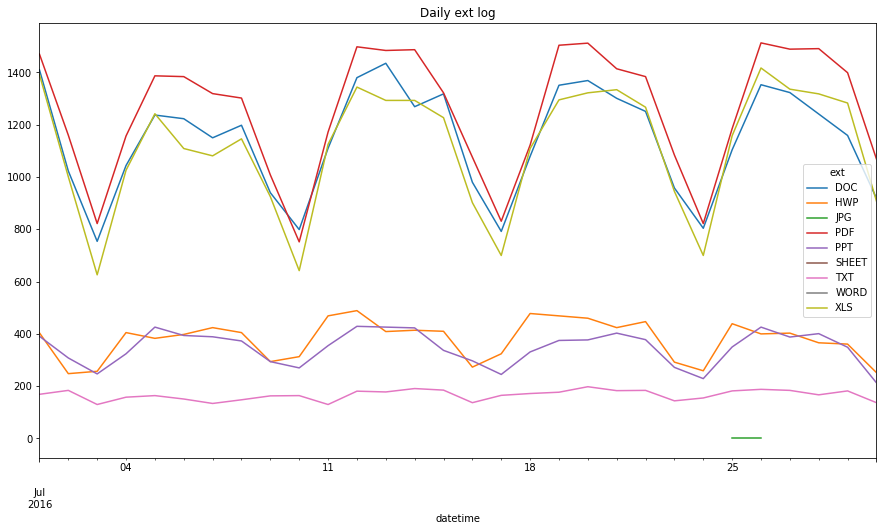

In [21]:
# 일별 확장자 사용 로그
funnel_data_ext.plot(figsize=(15, 8))
plt.title("Daily ext log")

Text(0, 0.5, 'session')

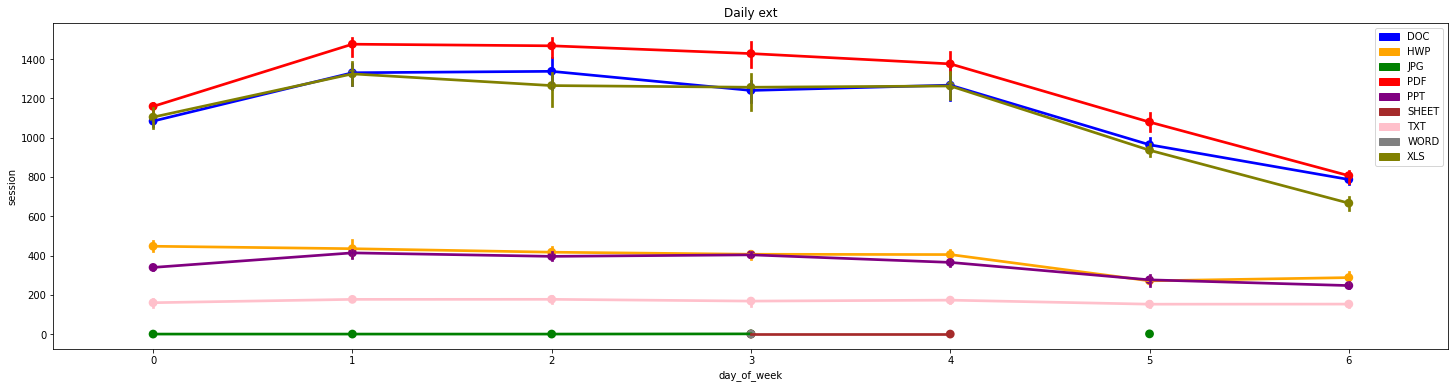

In [22]:
# 주간별 데이터 확인
import matplotlib.patches as mpatches

plt.figure(figsize=(25,6))

color = list(['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan',])
for n, c in enumerate(funnel_data_ext.columns):
    sns.pointplot(
        x=funnel_data_ext.index.day_of_week,
        y=funnel_data_ext[c],
        color = color[n],
        )
handles=[mpatches.Patch(color=col, label=label) for col, label in zip(color, funnel_data_ext.columns)]
plt.legend(handles=handles)

plt.title("Daily ext")
plt.xlabel("day_of_week")
plt.ylabel("session")

- pdf, xls, doc의 사용량이 가장 높으며, 주중보다 주말에 사용량이 감소

##### 1.2 Action type 통일 후 일별 action type 사용 횟수 확인

In [23]:
funnel_data.actiontype.unique()

array(['OPEN', 'CLOSE', 'RESET', 'SAVEAS', 'SAVE', 'SAVEAS_OTHER',
       'EXPORT_SAME', 'EXPORT'], dtype=object)

In [24]:
act_dic = {'SAVEAS': 'SAVE',
           'SAVEAS_OTHER': 'SAVE',
           'EXPORT_SAME': 'EXPORT'
            }

In [25]:
funnel_data.actiontype = funnel_data.actiontype.replace(act_dic)

In [26]:
funnel_data.actiontype.unique()

array(['OPEN', 'CLOSE', 'RESET', 'SAVE', 'EXPORT'], dtype=object)

In [27]:
funnel_data_actiontype = funnel_data.groupby(['datetime', 'actiontype',])['sessionid'].nunique().unstack()
funnel_data_actiontype.head()

actiontype,CLOSE,EXPORT,OPEN,RESET,SAVE
datetime,,,,,
2016-07-01,3834.0,2.0,4500.0,242.0,422.0
2016-07-02,2855.0,3.0,3382.0,188.0,328.0
2016-07-03,2005.0,NaN,2427.0,137.0,246.0
2016-07-04,3013.0,2.0,3559.0,193.0,339.0
2016-07-05,3505.0,3.0,4115.0,228.0,368.0


In [28]:
# 결측치 처리.
funnel_data_actiontype.fillna(0)

actiontype,CLOSE,EXPORT,OPEN,RESET,SAVE
datetime,,,,,
2016-07-01,3834.0,2.0,4500.0,242.0,422.0
2016-07-02,2855.0,3.0,3382.0,188.0,328.0
2016-07-03,2005.0,0.0,2427.0,137.0,246.0
2016-07-04,3013.0,2.0,3559.0,193.0,339.0
2016-07-05,3505.0,3.0,4115.0,228.0,368.0
2016-07-06,3448.0,4.0,4036.0,201.0,408.0
2016-07-07,3288.0,4.0,3867.0,214.0,357.0
2016-07-08,3382.0,3.0,3989.0,246.0,397.0
2016-07-09,2589.0,1.0,3083.0,266.0,309.0


Text(0.5, 1.0, 'Daily actiontype log')

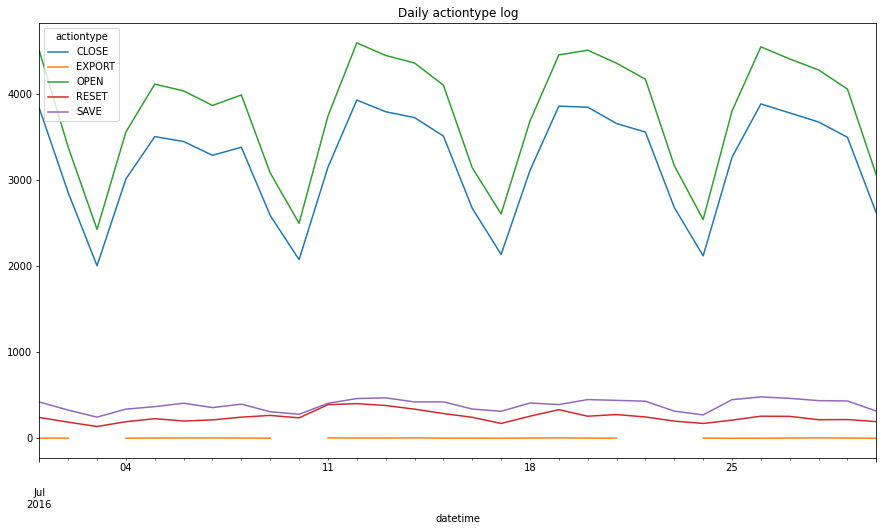

In [29]:
# 일별 확장자 사용 로그
funnel_data_actiontype.plot(figsize=(15, 8))
plt.title("Daily actiontype log")

Text(0, 0.5, 'session')

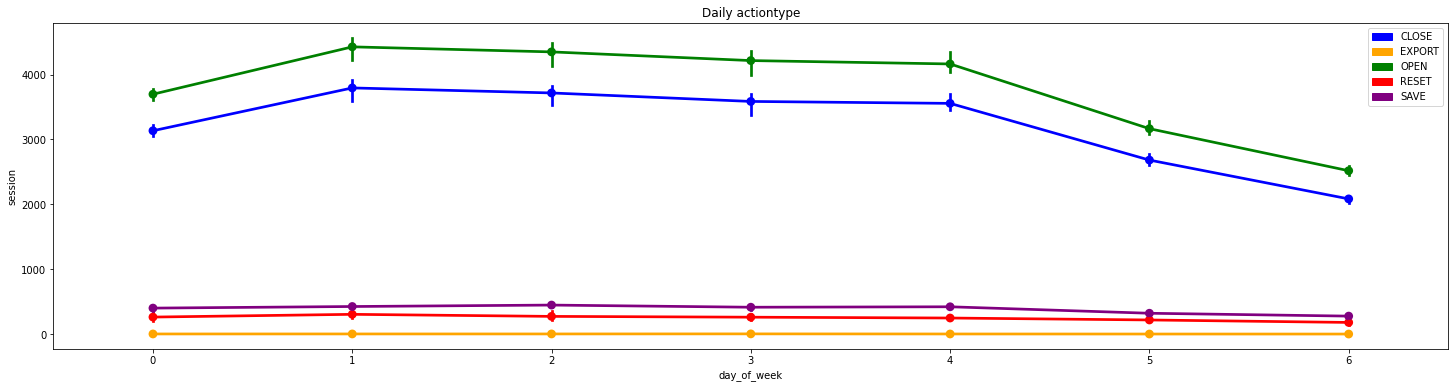

In [30]:
# 주간별 데이터 확인
import matplotlib.patches as mpatches

plt.figure(figsize=(25,6))

color = list(['blue', 'orange', 'green', 'red', 'purple', 'brown', 'cyan'])
for n, c in enumerate(funnel_data_actiontype.columns):
    sns.pointplot(
        x=funnel_data_actiontype.index.day_of_week,
        y=funnel_data_actiontype[c],
        color = color[n],
        )
handles=[mpatches.Patch(color=col, label=label) for col, label in zip(color, funnel_data_actiontype.columns)]
plt.legend(handles=handles)

plt.title("Daily actiontype")
plt.xlabel("day_of_week")
plt.ylabel("session")

- close, open의 활동량이 가장 많으며 주말에 활동량이 감소

##### 1.3 일별 screen 사용 횟수 확인

In [31]:
funnel_data_screen = funnel_data.groupby(['datetime', 'screen',])['sessionid'].nunique().unstack()
funnel_data_screen.head()

screen,InProduct_Mob,InProduct_Web,Main,Per_Dir,Pub_Dir,Purchase_done,Purchase_page
datetime,,,,,,,
2016-07-01,137.0,147.0,3582.0,296.0,1008.0,2.0,23.0
2016-07-02,89.0,124.0,2683.0,206.0,801.0,2.0,15.0
2016-07-03,50.0,83.0,1886.0,165.0,590.0,NaN,28.0
2016-07-04,112.0,104.0,2808.0,281.0,764.0,NaN,29.0
2016-07-05,118.0,138.0,3335.0,300.0,842.0,1.0,26.0


In [32]:
funnel_data_screen.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2016-07-01 to 2016-07-30
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   InProduct_Mob  30 non-null     float64
 1   InProduct_Web  30 non-null     float64
 2   Main           30 non-null     float64
 3   Per_Dir        30 non-null     float64
 4   Pub_Dir        30 non-null     float64
 5   Purchase_done  24 non-null     float64
 6   Purchase_page  30 non-null     float64
dtypes: float64(7)
memory usage: 1.9 KB


In [33]:
# 결측치 처리.
funnel_data_screen = funnel_data_screen.fillna(0)
funnel_data_screen.head()

screen,InProduct_Mob,InProduct_Web,Main,Per_Dir,Pub_Dir,Purchase_done,Purchase_page
datetime,,,,,,,
2016-07-01,137.0,147.0,3582.0,296.0,1008.0,2.0,23.0
2016-07-02,89.0,124.0,2683.0,206.0,801.0,2.0,15.0
2016-07-03,50.0,83.0,1886.0,165.0,590.0,0.0,28.0
2016-07-04,112.0,104.0,2808.0,281.0,764.0,0.0,29.0
2016-07-05,118.0,138.0,3335.0,300.0,842.0,1.0,26.0


Text(0.5, 1.0, 'Daily screen log')

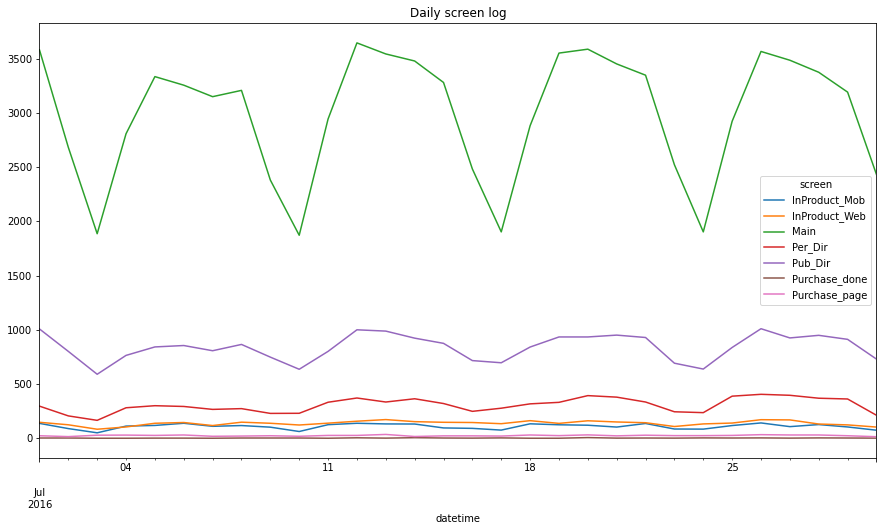

In [34]:
# 일별 데이터 확인
funnel_data_screen.plot(figsize=(15, 8))
plt.title("Daily screen log")

In [35]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# pio.renderers.default = "svg" # github에 올릴 시 plotly가 iframe 지원이 되지 않으므로, svg로 랜더링.
# pio.renderers.default = "png" # github에 올릴 시 plotly가 iframe 지원이 되지 않으므로, png로 랜더링.
# pd.options.plotting.backend = "plotly"
# funnel_data_screen.plot()

Text(0, 0.5, 'session')

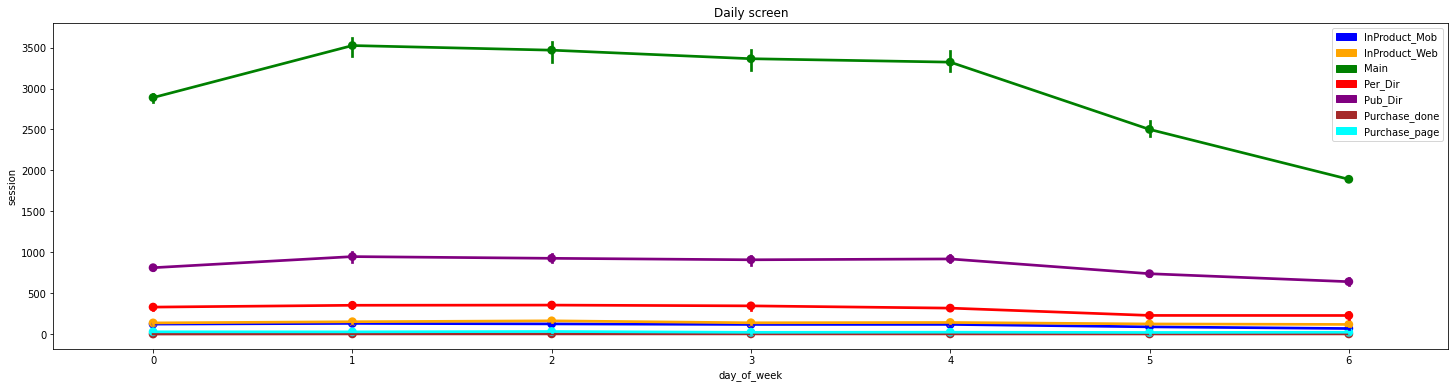

In [36]:
# 주간별 데이터 확인
import matplotlib.patches as mpatches

plt.figure(figsize=(25,6))

color = list(['blue', 'orange', 'green', 'red', 'purple', 'brown', 'cyan'])
for n, c in enumerate(funnel_data_screen.columns):
    sns.pointplot(
        x=funnel_data_screen.index.day_of_week,
        y=funnel_data_screen[c],
        color = color[n],
        )
handles=[mpatches.Patch(color=col, label=label) for col, label in zip(color, funnel_data_screen.columns)]
plt.legend(handles=handles)

plt.title("Daily screen")
plt.xlabel("day_of_week")
plt.ylabel("session")

- main 화면이 가장 많이 보여지며, 그 다음 pub_dir 화면으로 많이 가는 것을 확인 할 수 있음. 주중 사용량이 주말보다 높음

##### 1.4 screen funnel 분석

In [37]:
# column을 내림차순으로 정렬
screen_mean = funnel_data_screen.mean().sort_values(ascending=False)
funnel_data_screen_funnel = funnel_data_screen[screen_mean.index]
funnel_data_screen_funnel=funnel_data_screen_funnel.astype(int)
funnel_data_screen_funnel.index = funnel_data_screen_funnel.index.strftime('%Y-%m-%d')
funnel_data_screen_funnel.head()

screen,Main,Pub_Dir,Per_Dir,InProduct_Web,InProduct_Mob,Purchase_page,Purchase_done
datetime,,,,,,,
2016-07-01,3582,1008,296,147,137,23,2
2016-07-02,2683,801,206,124,89,15,2
2016-07-03,1886,590,165,83,50,28,0
2016-07-04,2808,764,281,104,112,29,0
2016-07-05,3335,842,300,138,118,26,1


Text(0.5, 1.0, 'screen heatmap')

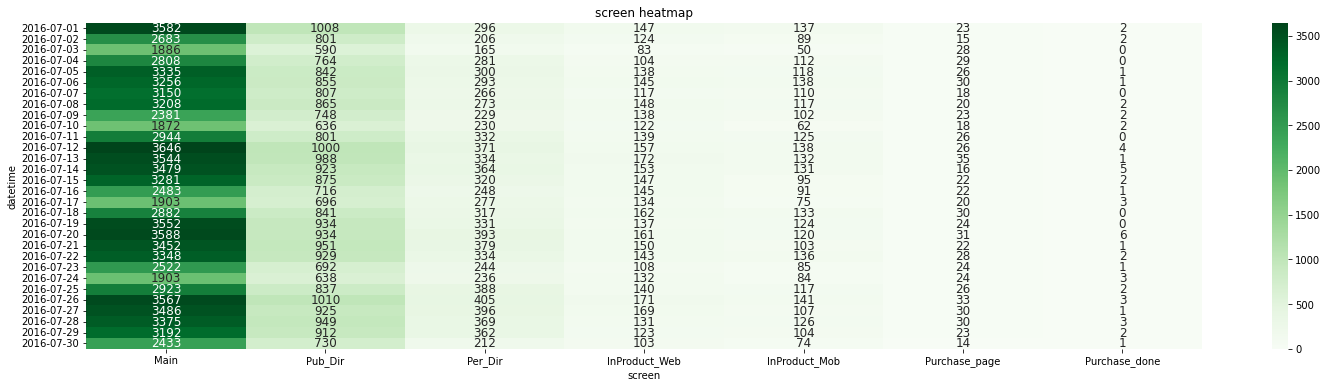

In [38]:
# 히트맵으로 사용자 수(session 수) 분석
plt.figure(figsize=(25,6))
cmap = 'Greens'
sns.heatmap(
    funnel_data_screen_funnel,
    annot=True,
    fmt="d",
    annot_kws={"size": 12},
    cmap=cmap,
    )
plt.title("screen heatmap")

In [39]:
# screen 별 전환 비율 계산.
conversion_rate = screen_mean[1:].values / screen_mean[:-1].values * 100
conversion_rate

array([28.10157923, 36.31781561, 45.27374057, 79.07313541, 22.46642247,
        7.20108696])

In [40]:
# main 에서 purchase_done 까지의 비율
screen_mean[-1] / screen_mean[0] * 100

0.05910956459671663

In [41]:
# 전환 비율에 맞는 label 생성
conversion_rate_label = [funnel_data_screen_funnel.columns[i]+"\nto\n"+funnel_data_screen_funnel.columns[i+1] for i in range(len(funnel_data_screen_funnel.columns)-1)]
conversion_rate_label

['Main\nto\nPub_Dir',
 'Pub_Dir\nto\nPer_Dir',
 'Per_Dir\nto\nInProduct_Web',
 'InProduct_Web\nto\nInProduct_Mob',
 'InProduct_Mob\nto\nPurchase_page',
 'Purchase_page\nto\nPurchase_done']

Text(0, 0.5, 'rate')

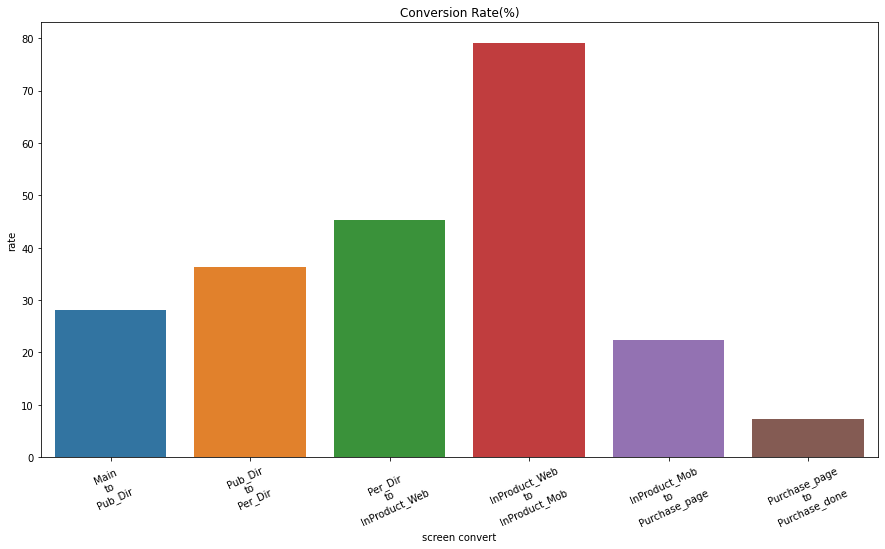

In [42]:
df = pd.DataFrame(conversion_rate, index=conversion_rate_label)
plt.figure(figsize=(15,8))
sns.barplot(
    x=df.index,
    y=df[0].values,
    )

plt.xticks(rotation=25)
plt.title("Conversion Rate(%)")
plt.xlabel("screen convert")
plt.ylabel("rate")

- 메인 화면에서 pub_dir로 전환율이 매우 적어 그 이후 전환율이 높다 해도 남아있는 고객의 수가 적음
- inproduct_web 에서 inproduct_mob로의 전환율이 매우 높지만, purchase_page로 전환하는 비율이 매우 적음
- 결과적으로 main에서 purchase_done까지의 전환율이 0.059%로 매우 적음을 확인.

##### 1.5 일별 로그, 세션 카운트

Text(0, 0.5, 'count')

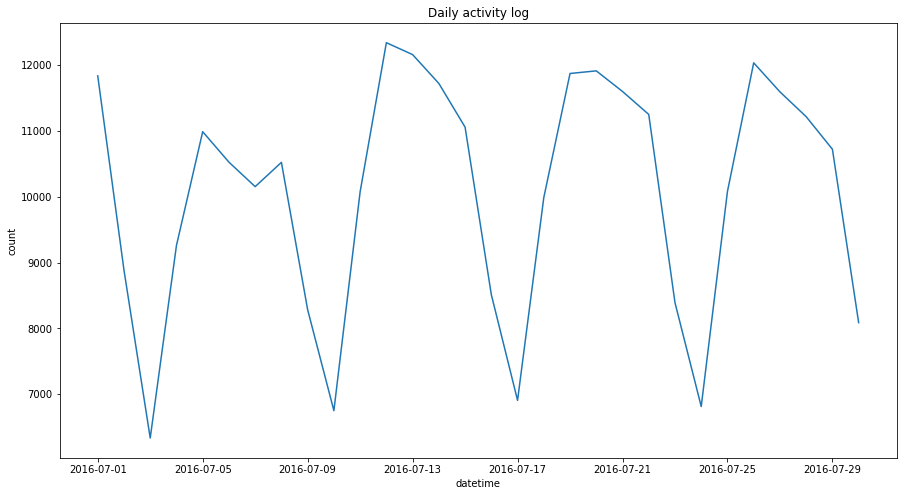

In [43]:
# 일별 사용자 기록
funnel_data_datetime = funnel_data.groupby("datetime").size()
plt.figure(figsize=(15, 8))
ax = sns.lineplot(
    x=funnel_data_datetime.index,
    y=funnel_data_datetime.values,
    )
    
plt.title("Daily activity log")
ax.set_ylabel('count')

Text(0, 0.5, 'count')

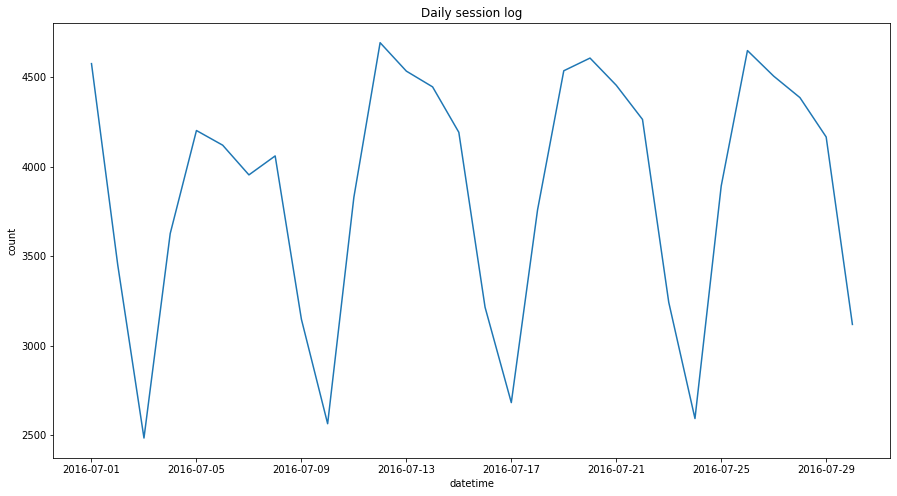

In [44]:
# 일별 세션 접속 기록
funnel_data_sessionid = funnel_data.groupby("datetime")['sessionid'].nunique()

plt.figure(figsize=(15, 8))
ax = sns.lineplot(
    x=funnel_data_sessionid.index,
    y=funnel_data_sessionid.values,
    )

plt.title("Daily session log")
ax.set_ylabel('count')


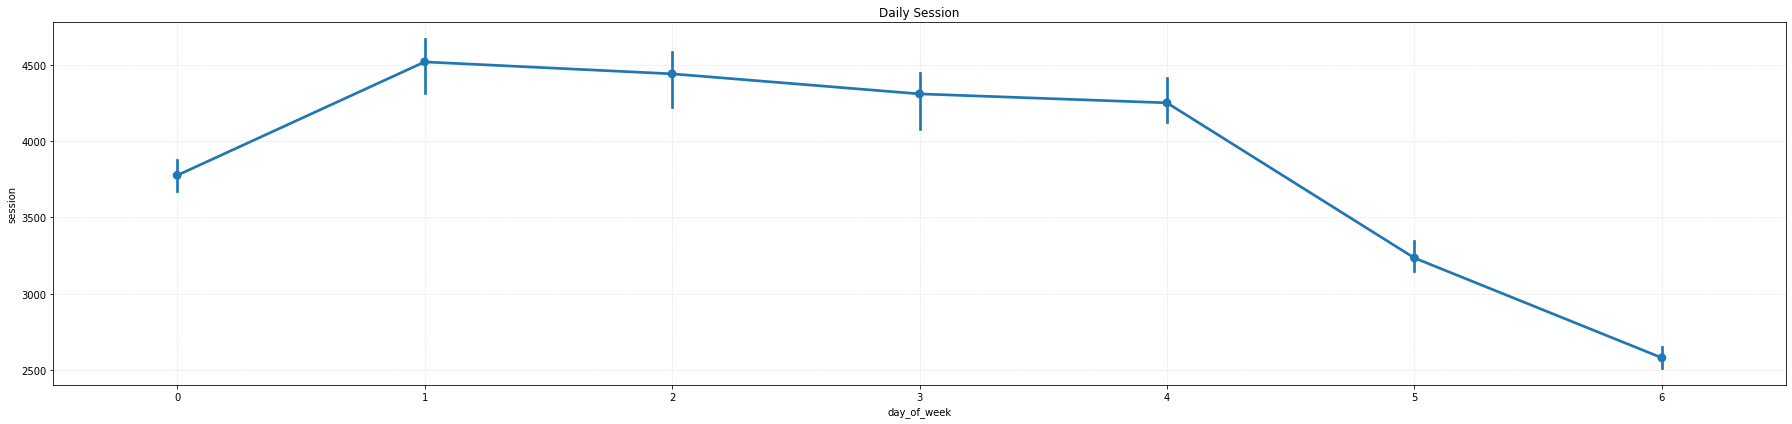

In [45]:
# 주간으로 데이터를 봤을때,
plt.figure(figsize=(25,6))
sns.pointplot(
    x=funnel_data_sessionid.index.day_of_week,
    y=funnel_data_sessionid.values
    )

plt.title("Daily Session")
plt.xlabel("day_of_week")
plt.ylabel("session")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

- 일별 활동과 session id의 활동 양상이 비슷함
    - 매일 사용하는 활동 양상이 비슷하다고 생각할 수 있음

##### 1.6 유지 되고 있는 session 수 확인

In [79]:
# 날짜 별 session id 접속 기록
funnel_data_sessionid = funnel_data.groupby(['datetime', 'Unnamed: 0', 'sessionid'])
funnel_data_sessionid = funnel_data_sessionid.count()
funnel_data_sessionid = funnel_data_sessionid.drop(['actiontype', 'ismydoc', 'ext', 'documentposition'], axis=1)
funnel_data_sessionid.head()

screen
datetime   Unnamed: 0 sessionid                               
2016-07-01 42         55a76813e6b1fae9db34f3ee45d75327       1
           43         55a76813e6b1fae9db34f3ee45d75327       1
           48         9c9318ef53bfab5779c98464b73c663b       1
           50         9c9318ef53bfab5779c98464b73c663b       1
           74         6bfb8ffb326523a6c42ccf614c022b5f       1

In [47]:
# 이용 날짜 별 어플 이용 횟수
summary = funnel_data_sessionid.reset_index().groupby('sessionid').agg({
    'screen':sum,
    'datetime' : [min, max]
})
summary.head()

screen   datetime           
                                    sum        min        max
sessionid                                                    
0001625bdb4fb9136f3f660f1b82188a      3 2016-07-19 2016-07-19
0001b27b377723145af12ec5f11a24a1      4 2016-07-20 2016-07-20
000210e29d35134179a3e3cf6ba8af36      2 2016-07-28 2016-07-28
00037c1d86c69902bffdc527f4fe21a8      4 2016-07-27 2016-07-28
0003abfa05f41cf0771a1f48a9e5ac78      2 2016-07-28 2016-07-28

In [48]:
# 보기 편하게 pivot table 정리
summary.columns = ['_'.join(col).lower() for col in summary.columns]
summary = summary.reset_index()
summary.head()

,sessionid,screen_sum,datetime_min,datetime_max
0,0001625bdb4fb9136f3f660f1b82188a,3,2016-07-19,2016-07-19
1,0001b27b377723145af12ec5f11a24a1,4,2016-07-20,2016-07-20
2,000210e29d35134179a3e3cf6ba8af36,2,2016-07-28,2016-07-28
3,00037c1d86c69902bffdc527f4fe21a8,4,2016-07-27,2016-07-28
4,0003abfa05f41cf0771a1f48a9e5ac78,2,2016-07-28,2016-07-28


In [49]:
# 이용 기간 column 추가
summary['activities_duration'] = summary.datetime_max.dt.strftime('%d').astype(int) - summary.datetime_min.dt.strftime('%d').astype(int)
summary.head()

,sessionid,screen_sum,datetime_min,datetime_max,activities_duration
0,0001625bdb4fb9136f3f660f1b82188a,3,2016-07-19,2016-07-19,0
1,0001b27b377723145af12ec5f11a24a1,4,2016-07-20,2016-07-20,0
2,000210e29d35134179a3e3cf6ba8af36,2,2016-07-28,2016-07-28,0
3,00037c1d86c69902bffdc527f4fe21a8,4,2016-07-27,2016-07-28,1
4,0003abfa05f41cf0771a1f48a9e5ac78,2,2016-07-28,2016-07-28,0


In [50]:
# 하루 이상 사용한 session의 수
print(summary[summary.activities_duration > 0].shape)
# 이틀 이상 사용한 session의 수
print(summary[summary.activities_duration > 1].shape)

(943, 5)
(130, 5)


In [64]:
# 어플을 켜놓고 있는 session들 기록 (이틀 이상 사용한 session을 기준으로)
maintenance_log = summary[summary.activities_duration > 1][['datetime_min', 'activities_duration']]
maintenance_log.set_index('datetime_min', inplace=True)
maintenance_log.head()

,activities_duration
datetime_min,
2016-07-25,4
2016-07-19,2
2016-07-19,3
2016-07-06,14
2016-07-08,9


Text(0, 0.5, 'count')

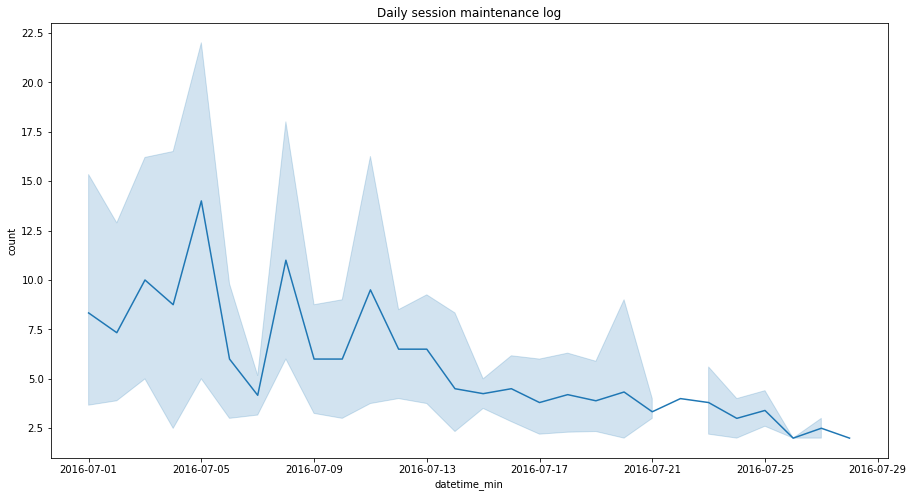

In [72]:
# 일간 session 유지 기록
plt.figure(figsize=(15, 8))
ax = sns.lineplot(
    x=maintenance_log.index,
    y=maintenance_log.activities_duration.values,
    )

plt.title("Daily session maintenance log")
ax.set_ylabel('count')

Text(0, 0.5, 'count')

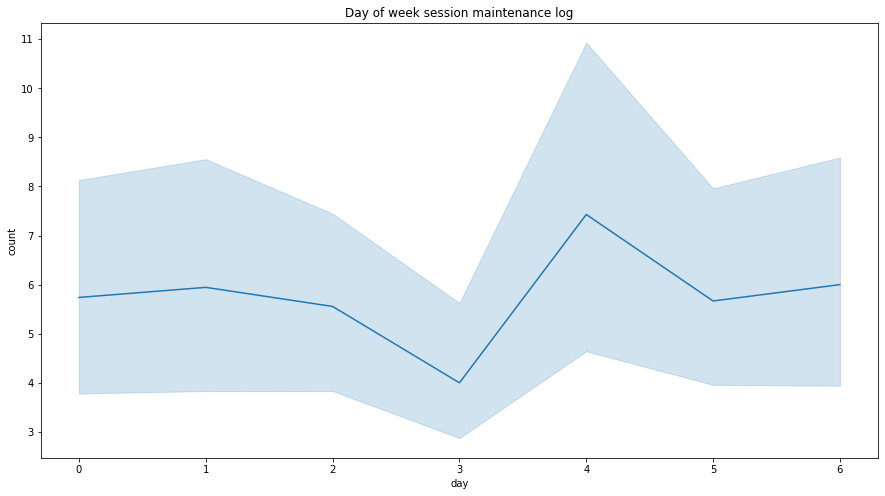

In [77]:
# 주간별 세션 유지 기록
plt.figure(figsize=(15, 8))
ax = sns.lineplot(
    x=maintenance_log.index.day_of_week,
    y=maintenance_log.activities_duration.values,
    )

plt.title("Day of week session maintenance log")
ax.set_xlabel('day')
ax.set_ylabel('count')

- 위 결과를 토대로, 켜놓고 사용을 하지 않는 고객들도 있으며, 그 수가 많지 않아 데이터 분석시 drop하는 것이 좋을 수 있다고 판단 됨.
- 또한 어플의 session을 유지하고 있는 사용자들이 미비하여 리소스의 사용 여부와 같은 어플의 개발 방향성을 제시할 수 있다고 생각 됨.